# Customer Segmentation

In this notebook, we will perform customer segmentation

# Load Data and Import Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
full_df = pd.read_csv('../dataset/cleaned/combined_cleansed.csv')

# Segment By Department

In [3]:
dept_segment = pd.crosstab(full_df['user_id'], full_df['department'])
dept_segment.sample(15)

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,
152995,0,0,2,4,0,0,0,4,2,0,6,4,0,0,0,0,3,0,2,5
169479,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,1,36
107695,0,0,0,19,0,0,0,4,0,0,1,0,5,18,0,6,0,0,49,0
138712,0,1,10,5,0,0,0,46,7,2,5,1,2,4,0,9,0,0,54,1
120749,0,0,1,8,0,0,5,29,0,0,3,0,0,2,0,10,0,0,33,7
29855,0,0,1,22,0,0,2,15,4,3,8,0,3,7,0,8,15,0,57,5
180302,1,0,2,2,0,0,3,9,1,1,2,3,3,4,0,10,1,0,26,4
197655,0,8,0,1,7,0,10,17,0,3,7,0,0,0,0,3,0,0,72,5
186697,0,0,2,11,1,0,4,9,4,2,0,2,2,2,0,1,2,0,9,6


In [4]:
def find_optimum_clusters(df):
    wcss = []
    sc = StandardScaler()
    X_sc = sc.fit_transform(df)
    
    for k in range(2, 20):
        print('Running {} Clusters...'.format(k))
        km = KMeans(n_clusters=k)
        km.fit(df)
        wcss.append(km.inertia_)

    fig, ax = plt.subplots(figsize=(7, 7))
    ax.plot(range(2, 20), wcss)
    ax.set_ylabel('Inertia', fontsize = 20)
    ax.set_xlabel('Number of Clusters', fontsize = 20)
    ax.set_title('Inertia over number of Clusters', fontsize = 20)

Running 2 Clusters...
Running 3 Clusters...
Running 4 Clusters...
Running 5 Clusters...
Running 6 Clusters...
Running 7 Clusters...
Running 8 Clusters...
Running 9 Clusters...
Running 10 Clusters...
Running 11 Clusters...
Running 12 Clusters...
Running 13 Clusters...
Running 14 Clusters...
Running 15 Clusters...
Running 16 Clusters...
Running 17 Clusters...
Running 18 Clusters...
Running 19 Clusters...


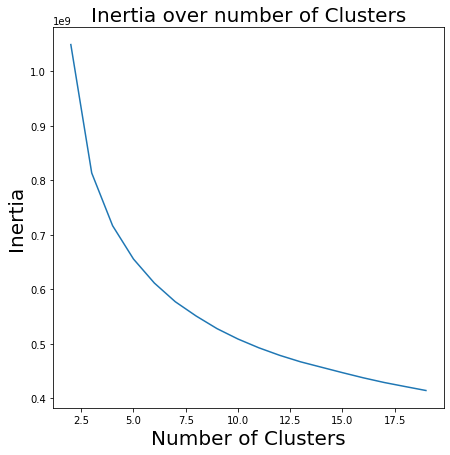

In [5]:
find_optimum_clusters(dept_segment)

6, 7 and 8 seems like the best

In [6]:
# #X = dept_segment.loc[:, ['x1', 'x2']]
# sc = StandardScaler()
# X_sc = sc.fit_transform(dept_segment)

In [7]:
def kmeans_fit_and_visualise(df, x, y, num_cluster):
    df = df.copy()
    sc = StandardScaler()
    X_sc = sc.fit_transform(df)
    km = KMeans(n_clusters = num_cluster, tol = 0.0001, max_iter = 300, random_state=42)
    km.fit(X_sc)
    km.predict(X_sc)
    
    df = pd.DataFrame(X_sc, columns = df.columns)
    df['cluster'] = km.labels_
    
    plt.figure(figsize=(7,7))
    colors = ["red", "green", "blue", 'orange', 'black', 'yellow', 'brown', 'purple', 'grey', 'coral']
    df['color'] = df['cluster'].map(lambda p: colors[p])
    ax = df.plot(kind ="scatter", x = x, y = y, c = df['color'])
#     ax.set_ylim(0, 1000)
#     ax.set_xlim(0, 300)

<Figure size 504x504 with 0 Axes>

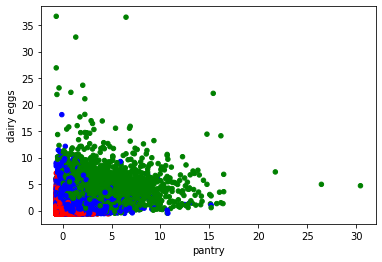

In [8]:
kmeans_fit_and_visualise(dept_segment, 'pantry', 'dairy eggs', 3)

<Figure size 504x504 with 0 Axes>

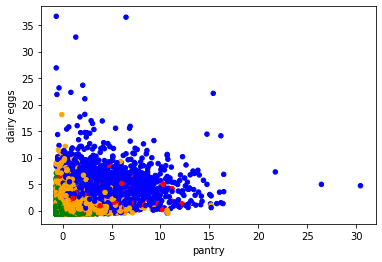

In [9]:
kmeans_fit_and_visualise(dept_segment, 'pantry', 'dairy eggs', 4)

<Figure size 504x504 with 0 Axes>

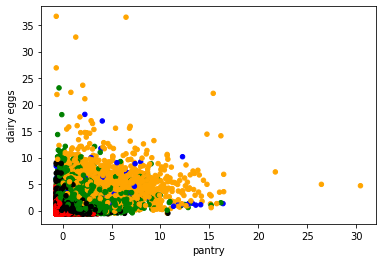

In [10]:
kmeans_fit_and_visualise(dept_segment, 'pantry', 'dairy eggs', 5)

<Figure size 504x504 with 0 Axes>

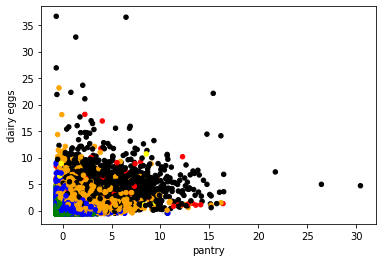

In [11]:
kmeans_fit_and_visualise(dept_segment, 'pantry', 'dairy eggs', 6)

<Figure size 504x504 with 0 Axes>

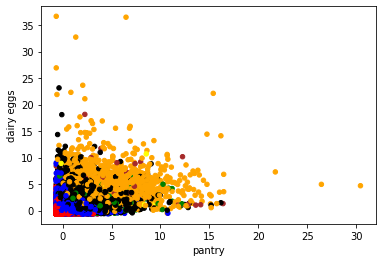

In [12]:
kmeans_fit_and_visualise(dept_segment, 'pantry', 'dairy eggs', 7)

<Figure size 504x504 with 0 Axes>

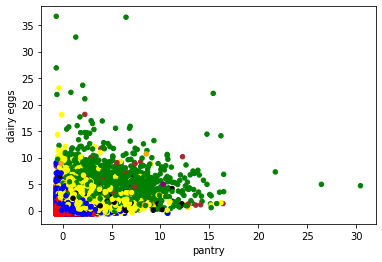

In [13]:
kmeans_fit_and_visualise(dept_segment, 'pantry', 'dairy eggs', 8)

## With PCA

In [14]:
pca = PCA(n_components = 7)
f = pca.fit_transform(dept_segment)
f = pd.DataFrame(f)

In [15]:
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print('Cumulative explained variance: {}'.format(np.round(cum_var_exp,3)))

# 4 PCAs already explained 90% of the variances

Cumulative explained variance: [0.709 0.825 0.875 0.906 0.932 0.944 0.956]


Running 2 Clusters...
Running 3 Clusters...
Running 4 Clusters...
Running 5 Clusters...
Running 6 Clusters...
Running 7 Clusters...
Running 8 Clusters...
Running 9 Clusters...
Running 10 Clusters...
Running 11 Clusters...
Running 12 Clusters...
Running 13 Clusters...
Running 14 Clusters...
Running 15 Clusters...
Running 16 Clusters...
Running 17 Clusters...
Running 18 Clusters...
Running 19 Clusters...


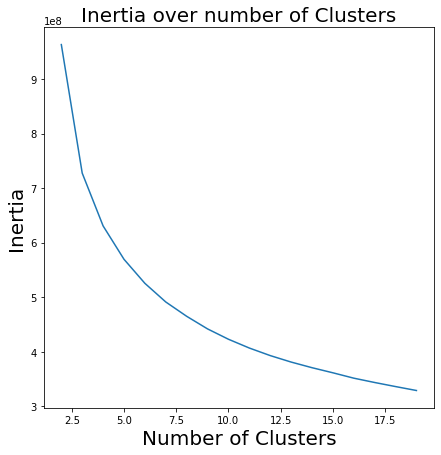

In [16]:
find_optimum_clusters(f)

<Figure size 504x504 with 0 Axes>

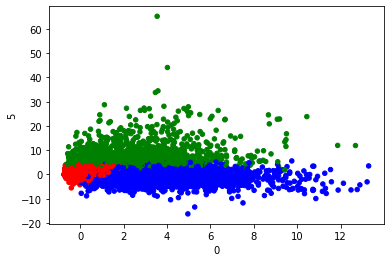

In [132]:
kmeans_fit_and_visualise(f, 0, 5, 3)

<Figure size 504x504 with 0 Axes>

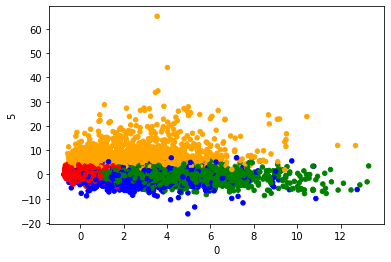

In [133]:
kmeans_fit_and_visualise(f, 0, 5, 4)

<Figure size 504x504 with 0 Axes>

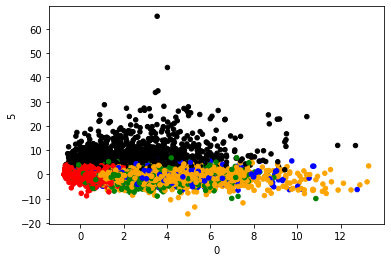

In [134]:
kmeans_fit_and_visualise(f, 0, 5, 5)

<Figure size 504x504 with 0 Axes>

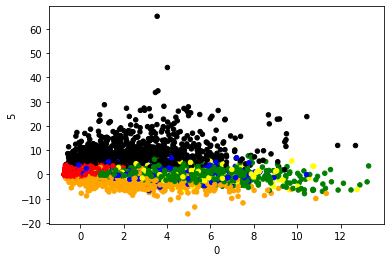

In [135]:
kmeans_fit_and_visualise(f, 0, 5, 6)

<Figure size 504x504 with 0 Axes>

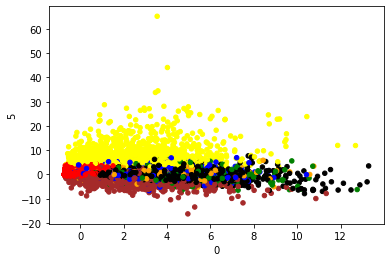

In [136]:
kmeans_fit_and_visualise(f, 0, 5, 7)

<Figure size 504x504 with 0 Axes>

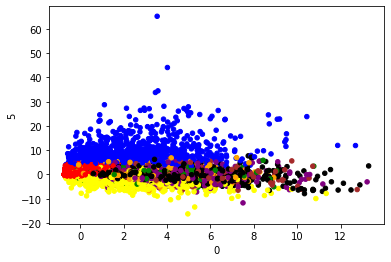

In [137]:
kmeans_fit_and_visualise(f, 0, 5, 8)

# Segment By Aisle

In [23]:
aisle_segment = pd.crosstab(full_df['user_id'], full_df['aisle'])
aisle_segment.sample(15)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
85629,0,0,0,0,0,0,0,0,0,0,...,3,0,0,3,0,0,0,0,0,1
194922,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
136309,0,0,0,0,0,1,1,0,0,0,...,2,2,0,0,0,0,4,0,1,0
206134,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,3
122346,0,2,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
205574,0,4,0,0,0,0,1,0,0,0,...,2,0,0,1,0,0,0,0,0,0
39245,0,0,0,0,0,0,0,0,0,0,...,0,34,0,0,0,0,0,180,0,202
85084,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,2,0,0
11635,0,0,0,0,0,0,0,0,0,0,...,1,4,0,2,0,0,0,0,0,13


Running 2 Clusters...
Running 3 Clusters...
Running 4 Clusters...
Running 5 Clusters...
Running 6 Clusters...
Running 7 Clusters...
Running 8 Clusters...
Running 9 Clusters...
Running 10 Clusters...
Running 11 Clusters...
Running 12 Clusters...
Running 13 Clusters...
Running 14 Clusters...
Running 15 Clusters...
Running 16 Clusters...
Running 17 Clusters...
Running 18 Clusters...
Running 19 Clusters...


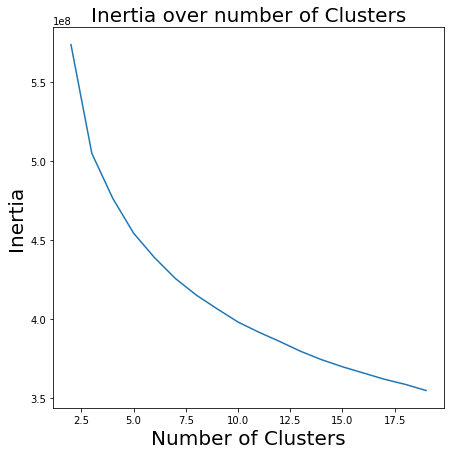

In [24]:
find_optimum_clusters(aisle_segment)

<Figure size 504x504 with 0 Axes>

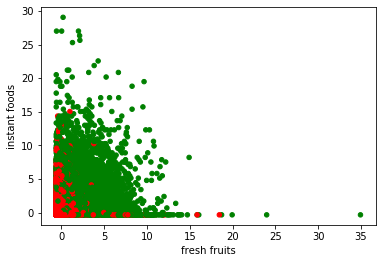

In [31]:
kmeans_fit_and_visualise(aisle_segment, 'fresh fruits', 'instant foods', 2)

<Figure size 504x504 with 0 Axes>

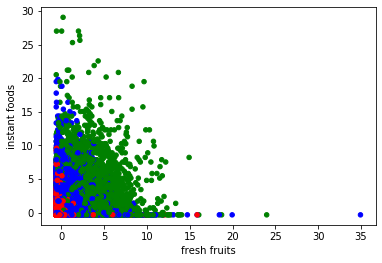

In [25]:
kmeans_fit_and_visualise(aisle_segment, 'fresh fruits', 'instant foods', 3)

<Figure size 504x504 with 0 Axes>

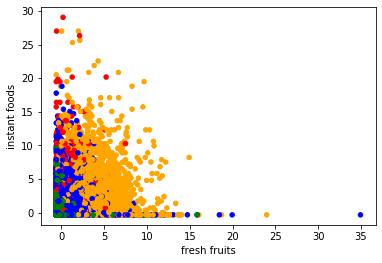

In [26]:
kmeans_fit_and_visualise(aisle_segment, 'fresh fruits', 'instant foods', 4)

<Figure size 504x504 with 0 Axes>

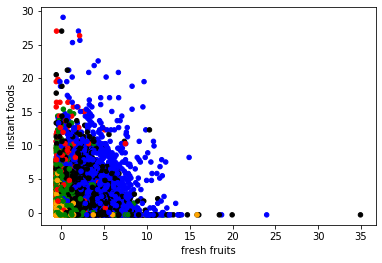

In [27]:
kmeans_fit_and_visualise(aisle_segment, 'fresh fruits', 'instant foods', 5)

<Figure size 504x504 with 0 Axes>

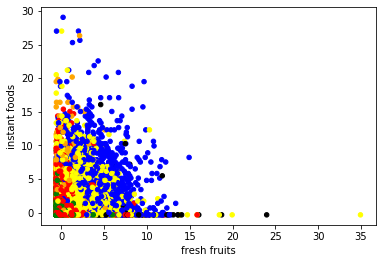

In [28]:
kmeans_fit_and_visualise(aisle_segment, 'fresh fruits', 'instant foods', 6)

<Figure size 504x504 with 0 Axes>

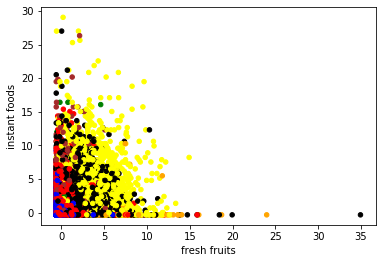

In [29]:
kmeans_fit_and_visualise(aisle_segment, 'fresh fruits', 'instant foods', 7)

<Figure size 504x504 with 0 Axes>

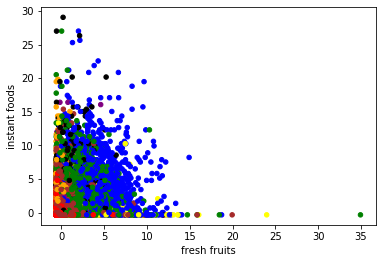

In [30]:
kmeans_fit_and_visualise(aisle_segment, 'fresh fruits', 'instant foods', 8)

## With PCA

In [34]:
pca = PCA(n_components = 7)
g = pca.fit_transform(aisle_segment)
g = pd.DataFrame(f)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print('Cumulative explained variance: {}'.format(np.round(cum_var_exp,3)))

# 7 components can explain 0.74% of the variance

Cumulative explained variance: [0.483 0.578 0.63  0.666 0.696 0.72  0.739]


Running 2 Clusters...
Running 3 Clusters...
Running 4 Clusters...
Running 5 Clusters...
Running 6 Clusters...
Running 7 Clusters...
Running 8 Clusters...
Running 9 Clusters...
Running 10 Clusters...
Running 11 Clusters...
Running 12 Clusters...
Running 13 Clusters...
Running 14 Clusters...
Running 15 Clusters...
Running 16 Clusters...
Running 17 Clusters...
Running 18 Clusters...
Running 19 Clusters...


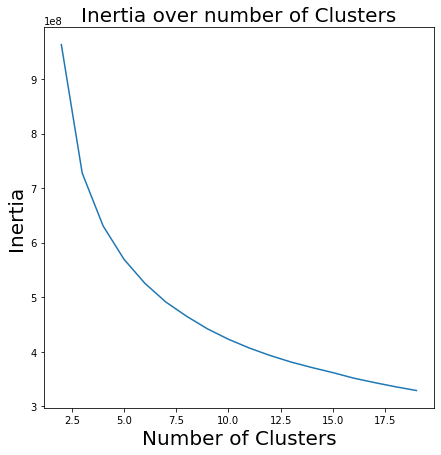

In [35]:
find_optimum_clusters(g)

<Figure size 504x504 with 0 Axes>

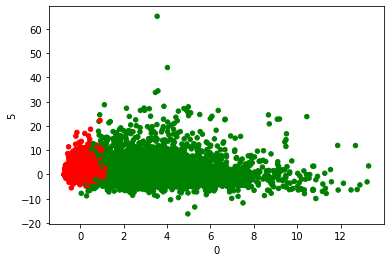

In [138]:
kmeans_fit_and_visualise(g, 0, 5, 2)

<Figure size 504x504 with 0 Axes>

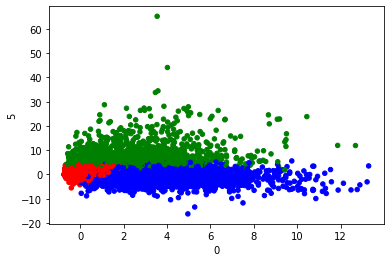

In [139]:
kmeans_fit_and_visualise(g, 0, 5, 3)

<Figure size 504x504 with 0 Axes>

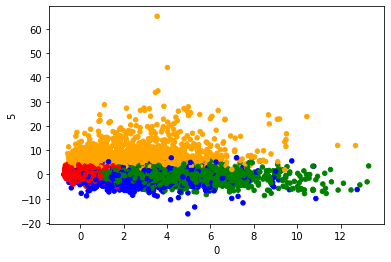

In [140]:
kmeans_fit_and_visualise(g, 0, 5, 4)

<Figure size 504x504 with 0 Axes>

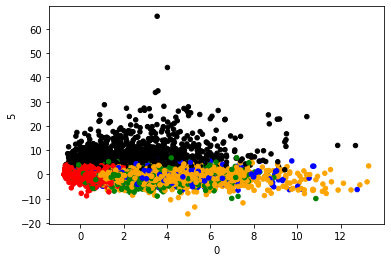

In [141]:
kmeans_fit_and_visualise(g, 0, 5, 5)

<Figure size 504x504 with 0 Axes>

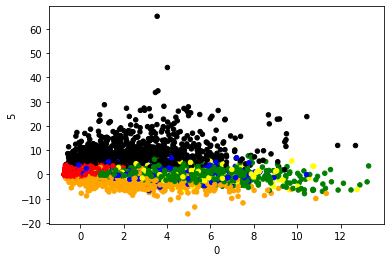

In [142]:
kmeans_fit_and_visualise(g, 0, 5, 6)

<Figure size 504x504 with 0 Axes>

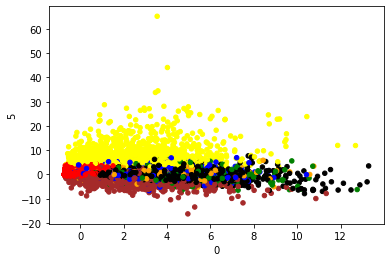

In [143]:
kmeans_fit_and_visualise(g, 0, 5, 7)

## Product Segmentation

In [173]:
aisle_by_cust_segment = pd.crosstab(full_df['aisle'], full_df['user_id'])
aisle_by_cust_segment.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,206200,206201,206202,206203,206204,206205,206206,206207,206208,206209
aisle,,,,,,,,,,,,,,,,,,,,,
air fresheners candles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
asian foods,0,3,0,0,2,0,0,1,0,1,...,0,2,10,0,2,0,4,0,3,1
baby accessories,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
baby bath body care,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
baby food formula,0,0,0,0,0,0,0,0,6,0,...,0,0,0,0,0,0,0,1,3,0


Running 2 Clusters...
Running 3 Clusters...
Running 4 Clusters...
Running 5 Clusters...
Running 6 Clusters...
Running 7 Clusters...
Running 8 Clusters...
Running 9 Clusters...
Running 10 Clusters...
Running 11 Clusters...
Running 12 Clusters...
Running 13 Clusters...
Running 14 Clusters...
Running 15 Clusters...
Running 16 Clusters...
Running 17 Clusters...
Running 18 Clusters...
Running 19 Clusters...


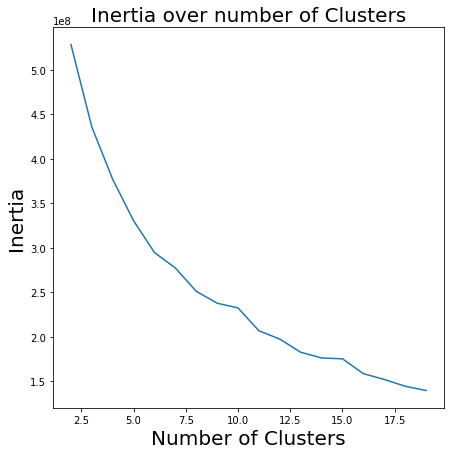

In [174]:
find_optimum_clusters(aisle_by_cust_segment)

<Figure size 504x504 with 0 Axes>

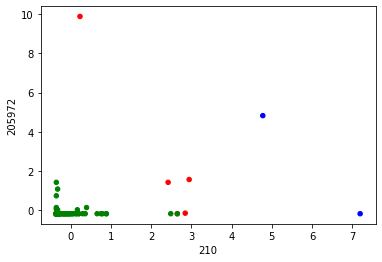

In [181]:
kmeans_fit_and_visualise(aisle_by_cust_segment, 210, 205972, 3)

<Figure size 504x504 with 0 Axes>

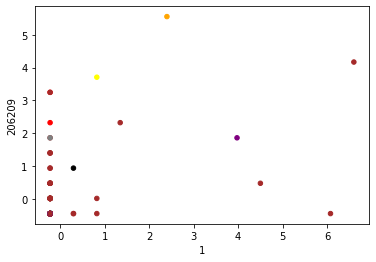

In [175]:
kmeans_fit_and_visualise(aisle_by_cust_segment, 1, 206209, 10)

In [ ]:
kmeans_fit_and_visualise(aisle_by_cust_segment, 1, 206209, 11)

## Testing

In [71]:
def test(df, x, y, num_cluster):
    df = df.copy()
    sc = StandardScaler()
    X_sc = sc.fit_transform(df)
    gmm = GaussianMixture(n_components = num_cluster) 
    gmm.fit(X_sc) 
#     X_sc = sc.fit_transform(df)
#     km = KMeans(n_clusters = num_cluster, tol = 0.0001, max_iter = 300, random_state=42)
#     ms.fit(X_sc)
    labels = gmm.predict(X_sc)
    
    df = pd.DataFrame(X_sc, columns = df.columns)
    df['cluster'] = labels
    
    plt.figure(figsize=(7,7))
    colors = ["red", "green", "blue", 'orange', 'black', 'yellow', 'brown', 'purple', 'grey', 'coral']
    df['color'] = df['cluster'].map(lambda p: colors[p])
    ax = df.plot(kind ="scatter", x = x, y = y, c = df['color'])

<Figure size 504x504 with 0 Axes>

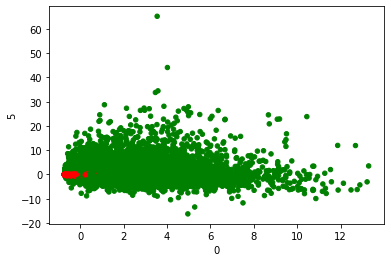

In [165]:
test(g, 0, 5, 2)

<Figure size 504x504 with 0 Axes>

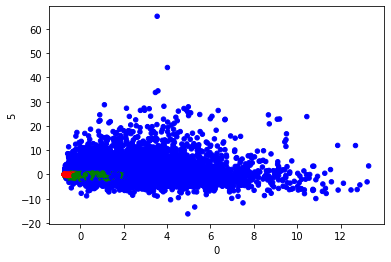

In [166]:
test(g, 0, 5, 3)

<Figure size 504x504 with 0 Axes>

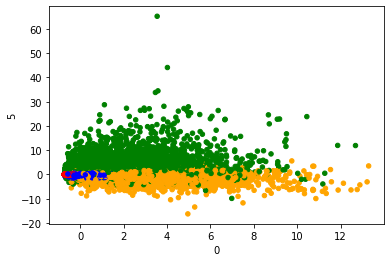

In [167]:
test(g, 0, 5, 4) 

<Figure size 504x504 with 0 Axes>

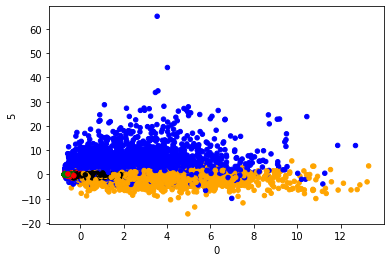

In [168]:
test(g, 0, 5, 5) 

<Figure size 504x504 with 0 Axes>

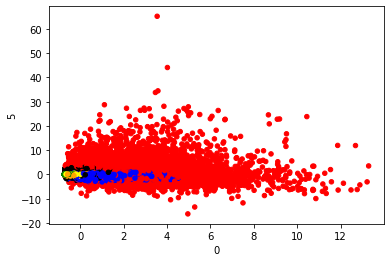

In [169]:
test(g, 0, 5, 6) 

<Figure size 504x504 with 0 Axes>

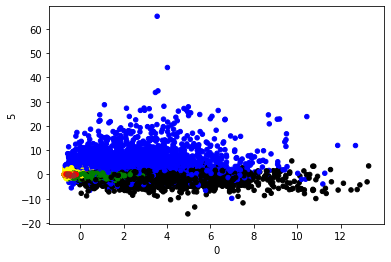

In [170]:
test(g, 0, 5, 7) 

## Test Visualisation

<Figure size 504x504 with 0 Axes>

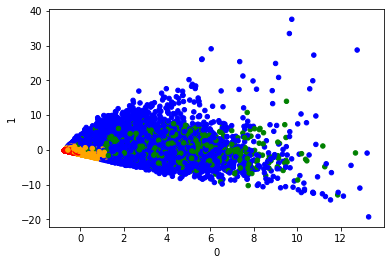

In [144]:
test(g, 0, 1, 4) 

<Figure size 504x504 with 0 Axes>

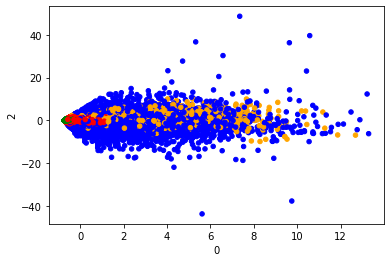

In [145]:
test(g, 0, 2, 4) 

<Figure size 504x504 with 0 Axes>

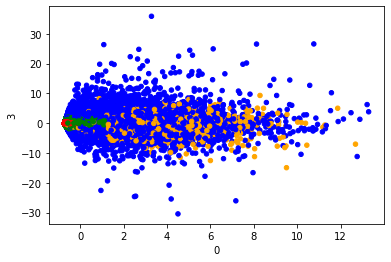

In [146]:
test(g, 0, 3, 4) 

<Figure size 504x504 with 0 Axes>

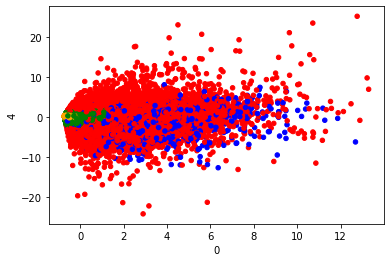

In [147]:
test(g, 0, 4, 4) 

<Figure size 504x504 with 0 Axes>

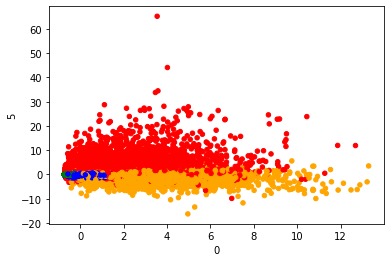

In [148]:
test(g, 0, 5, 4) 

<Figure size 504x504 with 0 Axes>

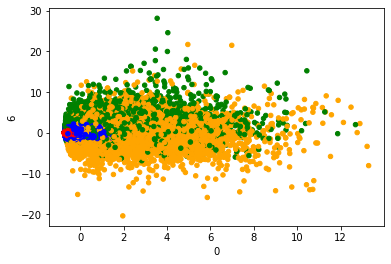

In [149]:
test(g, 0, 6, 4) 

<Figure size 504x504 with 0 Axes>

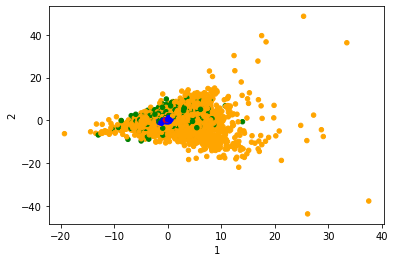

In [150]:
test(g, 1, 2, 4) 

<Figure size 504x504 with 0 Axes>

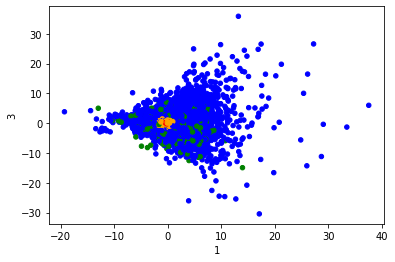

In [151]:
test(g, 1, 3, 4) 

<Figure size 504x504 with 0 Axes>

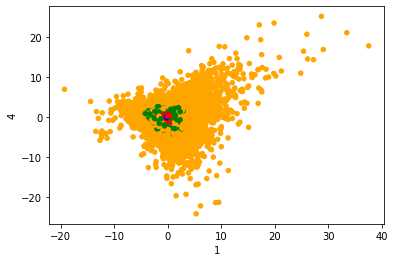

In [152]:
test(g, 1, 4, 4)

<Figure size 504x504 with 0 Axes>

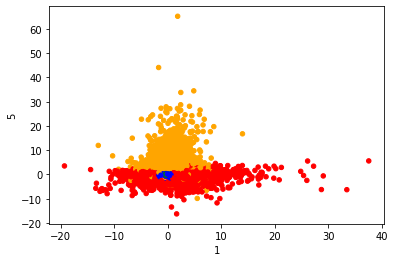

In [153]:
test(g, 1, 5, 4)

<Figure size 504x504 with 0 Axes>

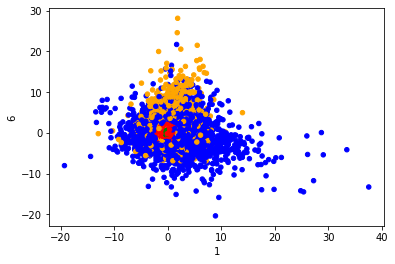

In [154]:
test(g, 1, 6, 4)

<Figure size 504x504 with 0 Axes>

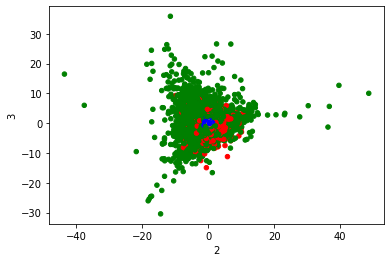

In [155]:
test(g, 2, 3, 4)

<Figure size 504x504 with 0 Axes>

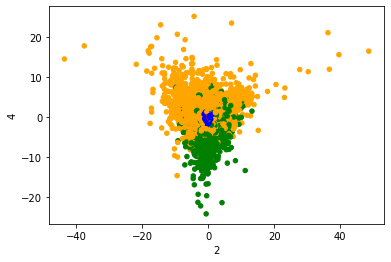

In [156]:
test(g, 2, 4, 4)

<Figure size 504x504 with 0 Axes>

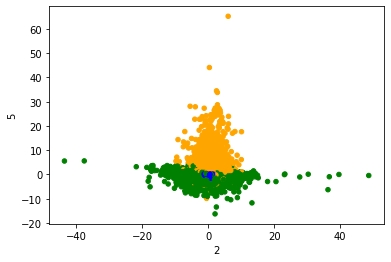

In [157]:
test(g, 2, 5, 4)

<Figure size 504x504 with 0 Axes>

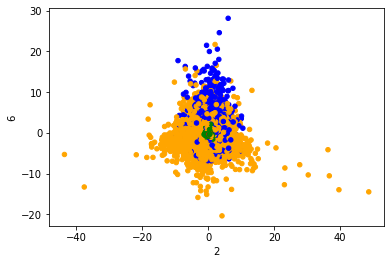

In [158]:
test(g, 2, 6, 4)

<Figure size 504x504 with 0 Axes>

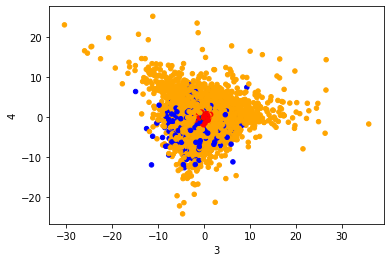

In [159]:
test(g, 3, 4, 4)

<Figure size 504x504 with 0 Axes>

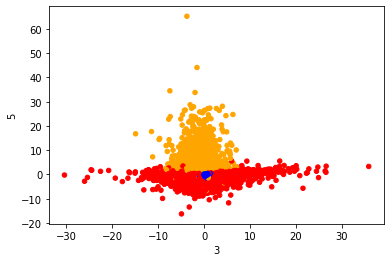

In [160]:
test(g, 3, 5, 4)

<Figure size 504x504 with 0 Axes>

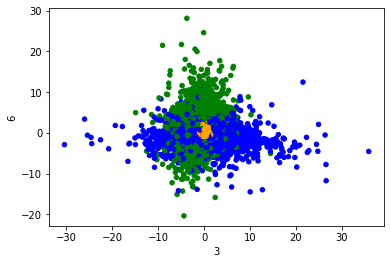

In [161]:
test(g, 3, 6, 4)

<Figure size 504x504 with 0 Axes>

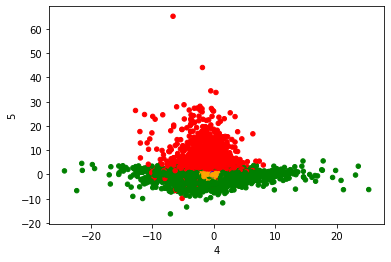

In [162]:
test(g, 4, 5, 4)

<Figure size 504x504 with 0 Axes>

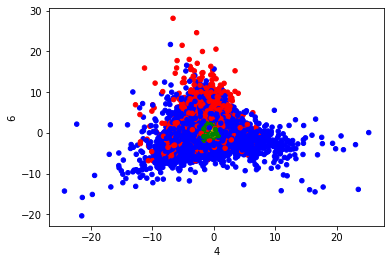

In [163]:
test(g, 4, 6, 4)

<Figure size 504x504 with 0 Axes>

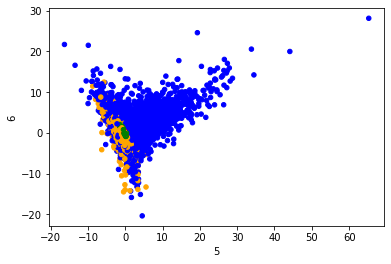

In [164]:
test(g, 5, 6, 4)

# Segment By Product

# Segment By Recency

# Segment By Frequency

# Segment By Monetary - No Price